In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import random_walk
import CWPFGTD

In [2]:
def getFeatures(state):
    if state==0 or state==1001:
        return np.zeros((10,1))
    index = int((state-1)/100)
    features = np.zeros((10,1))
    features[index]=1
    return features

In [3]:
mdp = random_walk.randomWalk()

In [4]:
stepCount = 1000000
state = mdp.getStartState()
newFeatures = getFeatures(state)
Transitions = []
discount=1.0

In [5]:
for i in range(stepCount):
    oldFeatures = newFeatures
    state,reward = mdp.getTransition(state)
    newFeatures = getFeatures(state)
    sample = (1.0,reward,oldFeatures,newFeatures)
    Transitions.append(sample)
    if state == 0 or state == 1001:
        state = mdp.getStartState()
        newFeatures = getFeatures(state)


In [6]:
A = []
b = []
d = 10
M = []
for i in range(stepCount):
    sample = Transitions[i]
    temp = sample[2] - discount * sample[3]
    result_A = np.matmul(sample[0]*sample[2].reshape((d,1)),temp.reshape((1,d)))
    A.append(result_A)
    result_b = sample[1]*sample[0]*sample[2]
    b.append(result_b)
    result_M = np.matmul(sample[2].reshape((d,1)),sample[2].reshape((1,d)))
    M.append(result_M)

In [7]:
def calc_g_hat_theta(A_mat,y_vect):
    return - np.matmul(np.transpose(A_mat),y_vect.reshape((d,1)))
def calc_g_hat_y(b_vect,A_mat,theta_vect,M_mat,y_vect):
    a1 =-b_vect
    a2 =np.matmul(A_mat,theta_vect.reshape((d,1)))
    a3 =np.matmul(M_mat,y_vect.reshape((d,1)))
    return a1+a2+a3

In [8]:
theta = np.array([random.uniform(-1,1) for i in range(d)]).reshape((d,1))
y = np.array([random.uniform(-1,1) for i in range(d)]).reshape((d,1))

In [9]:
g_hat_theta = calc_g_hat_theta(A[0],y)
g_hat_y = calc_g_hat_y(b[0],A[0],theta,M[0],y)
CW_theta = CWPFGTD.Algo(g_hat_theta,d)
CW_y = CWPFGTD.Algo(g_hat_y,d)

In [10]:
thetas = [theta]
ys = [y]
for i in range(1,stepCount):
    theta = CW_theta.getWeight()
    y = CW_y.getWeight()
    thetas.append(theta)
    ys.append(y)
    g_hat_theta = calc_g_hat_theta(A[i],y)
    g_hat_y = calc_g_hat_y(b[i],A[i],theta,M[i],y)
    CW_theta.update(g_hat_theta)
    CW_y.update(g_hat_y)

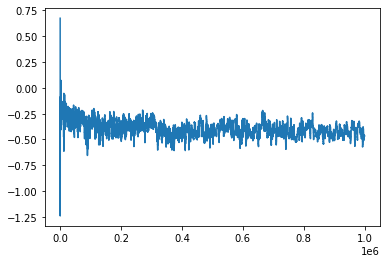

In [11]:
plt.plot(range(stepCount),np.array(thetas)[:,0])

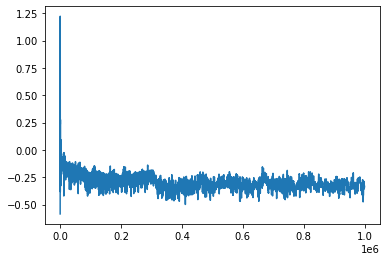

In [12]:
plt.plot(range(stepCount),np.array(thetas)[:,1])

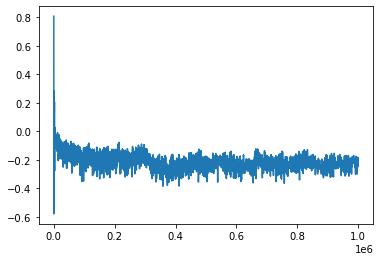

In [13]:
plt.plot(range(stepCount),np.array(thetas)[:,2])

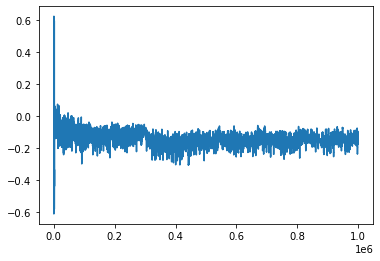

In [14]:
plt.plot(range(stepCount),np.array(thetas)[:,3])

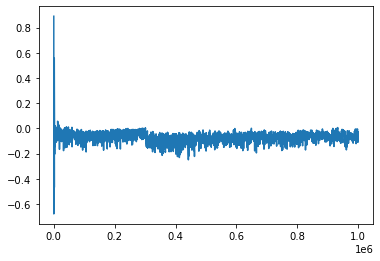

In [15]:
plt.plot(range(stepCount),np.array(thetas)[:,4])

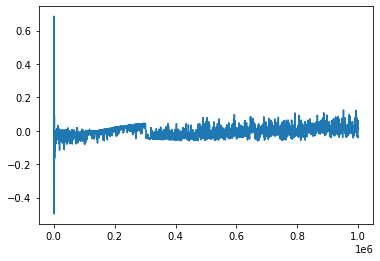

In [16]:
plt.plot(range(stepCount),np.array(thetas)[:,5])

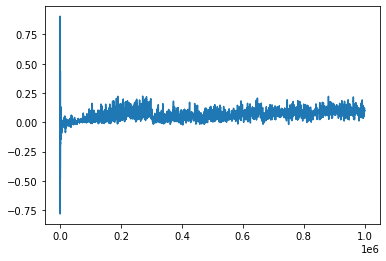

In [17]:
plt.plot(range(stepCount),np.array(thetas)[:,6])

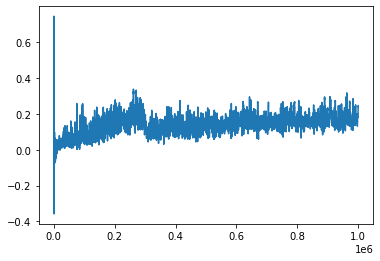

In [18]:
plt.plot(range(stepCount),np.array(thetas)[:,7])

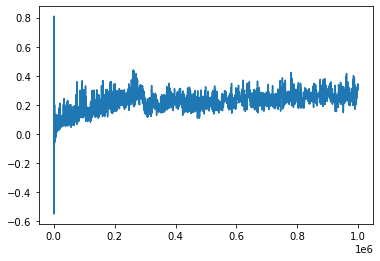

In [19]:
plt.plot(range(stepCount),np.array(thetas)[:,8])

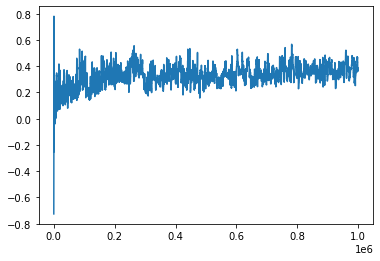

In [20]:
plt.plot(range(stepCount),np.array(thetas)[:,9])

In [21]:
values = [np.matmul(np.transpose(getFeatures(i)),thetas[-1])[0] for i in range(1,1001)]

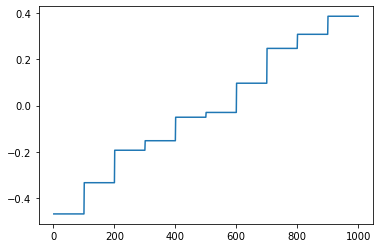

In [22]:
plt.plot(range(1,1001),values)